In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Configurar el estilo de los gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Datos de rendimiento
# Datos de rendimiento
data = {
    'Estructura': ['Lista Enlazada', 'Lista Enlazada', 'Lista Enlazada', 'Lista Enlazada',
                   'Árbol Binario', 'Árbol Binario', 'Árbol Binario', 'Árbol Binario',
                   'Tabla Hash', 'Tabla Hash', 'Tabla Hash', 'Tabla Hash',
                   'Árbol RojoNegro', 'Árbol RojoNegro', 'Árbol RojoNegro', 'Árbol RojoNegro'],
    'Operación': ['Búsqueda', 'Eliminación', 'Búsqueda', 'Eliminación',
                  'Búsqueda', 'Eliminación', 'Búsqueda', 'Eliminación',
                  'Búsqueda', 'Eliminación', 'Búsqueda', 'Eliminación',
                  'Búsqueda', 'Eliminación', 'Búsqueda', 'Eliminación'],
    'Tipo_Datos': ['Aleatorios', 'Aleatorios', 'Ordenados', 'Ordenados',
                   'Aleatorios', 'Aleatorios', 'Ordenados', 'Ordenados',
                   'Aleatorios', 'Aleatorios', 'Ordenados', 'Ordenados',
                   'Aleatorios', 'Aleatorios', 'Ordenados', 'Ordenados'],
    'Promedio': [43.60097, 46.84847, 52.88897, 50.377,
                 0.004293, 0.0042262, 0.008586, 0.0084524,  
                 0.00123193, 0.0015318, 0.0012591, 0.00142217,
                 0.0055128, 0.00480997, 0.00476623, 0.0065817]
}

df = pd.DataFrame(data)

# Crear figura principal
fig = plt.figure(figsize=(20, 16))

# Colores para cada estructura
colors = {
    'Lista Enlazada': ['#FF6B6B', '#FF9999'],
    'Árbol Binario': ['#4ECDC4', '#579f90'],
    'Tabla Hash': ['#45B7D1', '#3F90B2'],
    'Árbol RojoNegro': ['#96CEB4', '#81A592']
}

estructuras = df['Estructura'].unique()

# Análisis individual para cada estructura
for i, estructura in enumerate(estructuras, 1):
    plt.subplot(2, 2, i)

    # Filtrar datos para la estructura actual
    estructura_data = df[df['Estructura'] == estructura]

    # Separar por tipo de datos
    aleatorios = estructura_data[estructura_data['Tipo_Datos'] == 'Aleatorios']
    ordenados = estructura_data[estructura_data['Tipo_Datos'] == 'Ordenados']

    # Configurar posiciones de las barras
    x = np.arange(2)  # 2 operaciones: Búsqueda y Eliminación
    width = 0.35

    # Crear barras
    bars1 = plt.bar(x - width/2, aleatorios['Promedio'].values, width,
                    label='Aleatorios', color=colors[estructura][0], alpha=0.8)
    bars2 = plt.bar(x + width/2, ordenados['Promedio'].values, width,
                    label='Ordenados', color=colors[estructura][1], alpha=0.8)

    # Configurar el gráfico
    plt.title(f'{estructura}\nAleatorios vs Ordenados', fontsize=14, fontweight='bold')
    plt.ylabel('Tiempo (ms)', fontsize=12)
    plt.xlabel('Operación', fontsize=12)
    plt.xticks(x, ['Búsqueda', 'Eliminación'])
    plt.legend()

    # Usar escala logarítmica si es necesario
    if estructura == 'Lista Enlazada':
        plt.yscale('linear')
    else:
        plt.yscale('log')

    # Añadir valores en las barras
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, height,
                     f'{height:.6f}' if height < 1 else f'{height:.3f}',
                     ha='center', va='bottom', fontsize=9, rotation=0)

plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'pandas'

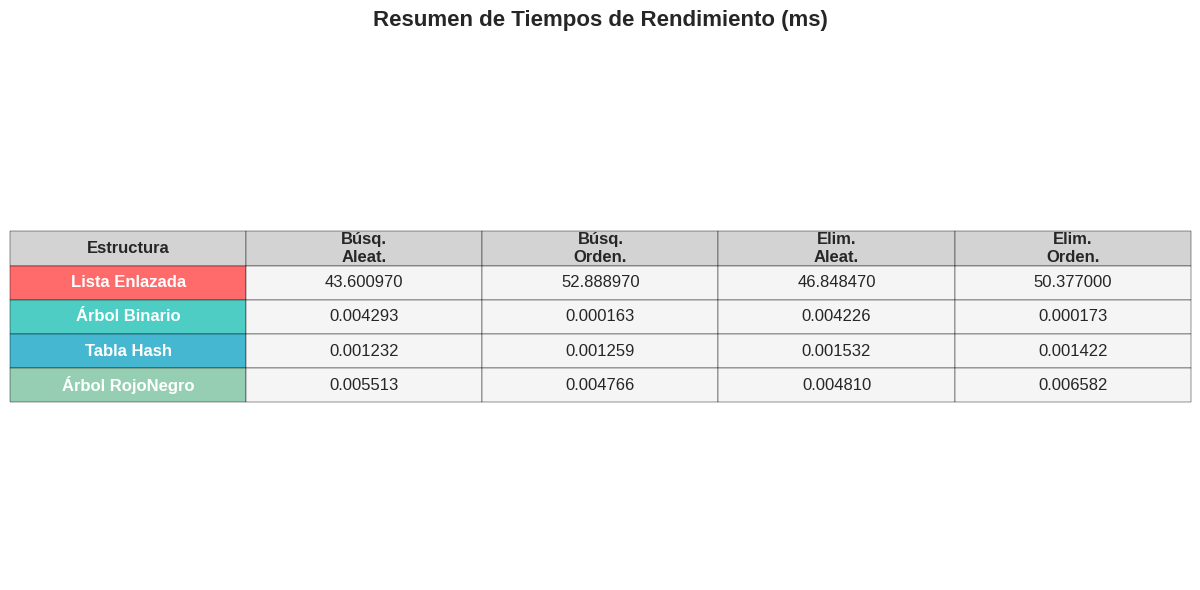

In [ ]:
# Crear solo la tabla de resumen con colores
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.axis('tight')
ax.axis('off')

# Crear tabla de resumen
table_data = []
for estructura in df['Estructura'].unique():
    struct_data = df[df['Estructura'] == estructura]
    busq_aleat = struct_data[(struct_data['Operación'] == 'Búsqueda') & (struct_data['Tipo_Datos'] == 'Aleatorios')]['Promedio'].values[0]
    busq_orden = struct_data[(struct_data['Operación'] == 'Búsqueda') & (struct_data['Tipo_Datos'] == 'Ordenados')]['Promedio'].values[0]
    elim_aleat = struct_data[(struct_data['Operación'] == 'Eliminación') & (struct_data['Tipo_Datos'] == 'Aleatorios')]['Promedio'].values[0]
    elim_orden = struct_data[(struct_data['Operación'] == 'Eliminación') & (struct_data['Tipo_Datos'] == 'Ordenados')]['Promedio'].values[0]

    table_data.append([estructura, f'{busq_aleat:.6f}', f'{busq_orden:.6f}', f'{elim_aleat:.6f}', f'{elim_orden:.6f}'])

table = ax.table(cellText=table_data,
                colLabels=['Estructura', 'Búsq.\nAleat.', 'Búsq.\nOrden.', 'Elim.\nAleat.', 'Elim.\nOrden.'],
                cellLoc='center',
                loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.8)

# Colores diferentes para cada estructura en la primera columna
colores_estructuras = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

# Colorear las celdas
for i in range(len(table_data)):
    # Columna de estructuras con colores diferentes para cada fila
    table[(i+1, 0)].set_facecolor(colores_estructuras[i])
    table[(i+1, 0)].set_text_props(weight='bold', color='white')

    # Resto de columnas con color uniforme
    for j in range(1, 5):
        table[(i+1, j)].set_facecolor('#F5F5F5')

# Colorear el encabezado
for j in range(5):
    table[(0, j)].set_facecolor('#D3D3D3')
    table[(0, j)].set_text_props(weight='bold')

ax.set_title('Resumen de Tiempos de Rendimiento (ms)', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

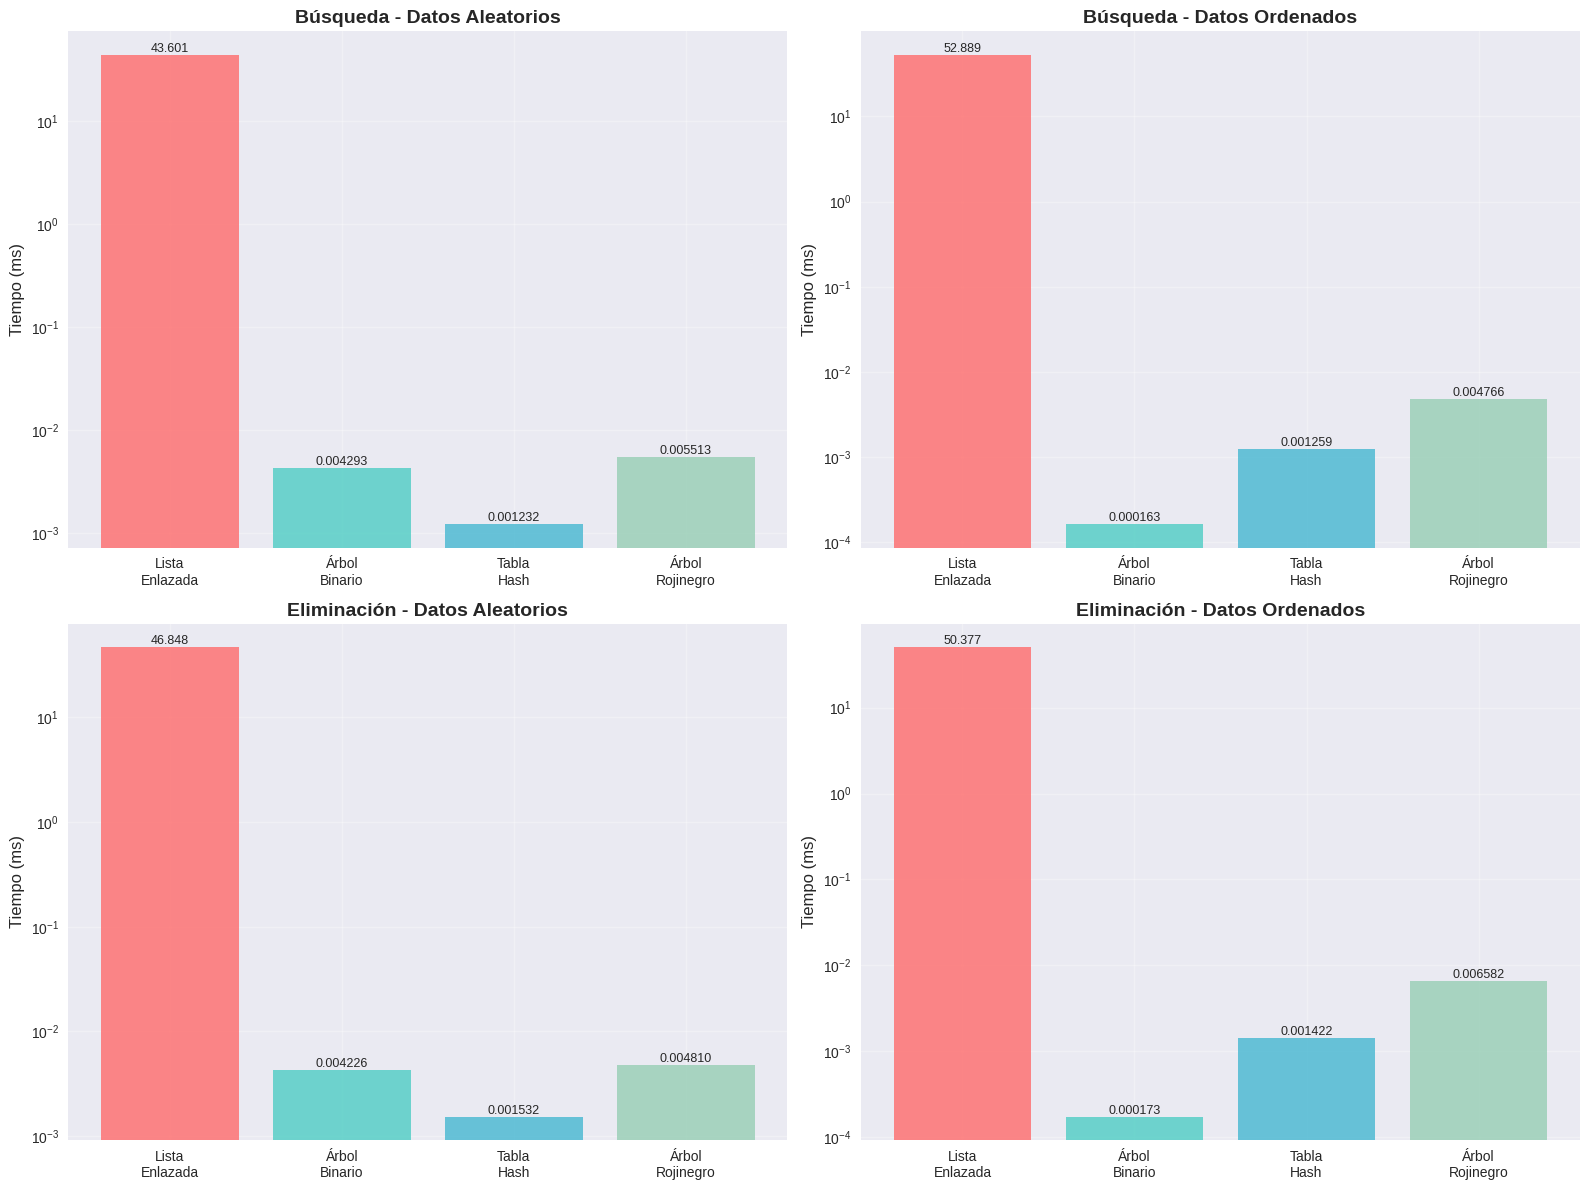

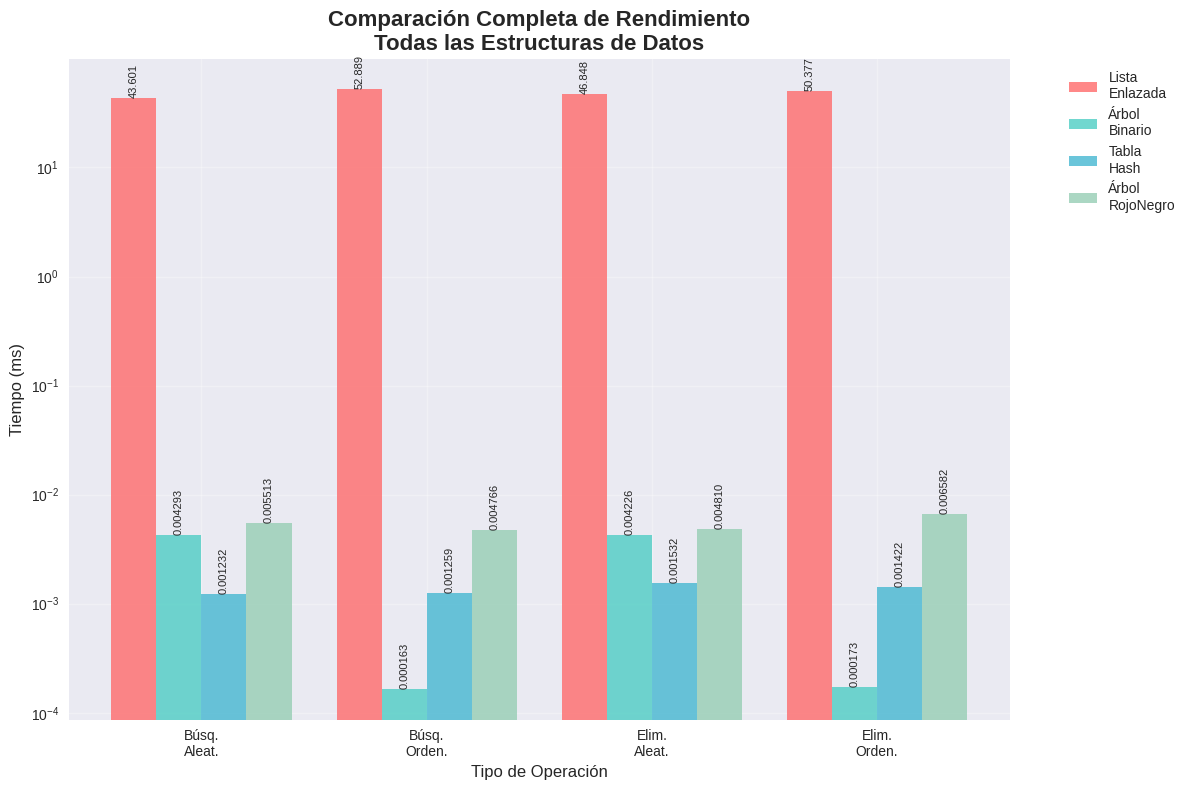

In [ ]:
# Crear figura con múltiples gráficos comparativos
fig = plt.figure(figsize=(16, 12))

# Colores para cada estructura
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
estructuras = df['Estructura'].unique()

# 1. Gráfico de barras comparativo - Búsqueda con datos aleatorios
plt.subplot(2, 2, 1)
busq_aleat = df[(df['Operación'] == 'Búsqueda') & (df['Tipo_Datos'] == 'Aleatorios')]['Promedio'].values
bars = plt.bar(range(len(estructuras)), busq_aleat, color=colors, alpha=0.8)
plt.title('Búsqueda - Datos Aleatorios', fontsize=14, fontweight='bold')
plt.ylabel('Tiempo (ms)', fontsize=12)
plt.xticks(range(len(estructuras)), ['Lista\nEnlazada', 'Árbol\nBinario', 'Tabla\nHash', 'Árbol\nRojinegro'], rotation=0)
plt.yscale('log')
plt.grid(True, alpha=0.3)

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.6f}' if height < 1 else f'{height:.3f}',
             ha='center', va='bottom', fontsize=9)

# 2. Gráfico de barras comparativo - Búsqueda con datos ordenados
plt.subplot(2, 2, 2)
busq_orden = df[(df['Operación'] == 'Búsqueda') & (df['Tipo_Datos'] == 'Ordenados')]['Promedio'].values
bars = plt.bar(range(len(estructuras)), busq_orden, color=colors, alpha=0.8)
plt.title('Búsqueda - Datos Ordenados', fontsize=14, fontweight='bold')
plt.ylabel('Tiempo (ms)', fontsize=12)
plt.xticks(range(len(estructuras)), ['Lista\nEnlazada', 'Árbol\nBinario', 'Tabla\nHash', 'Árbol\nRojinegro'], rotation=0)
plt.yscale('log')
plt.grid(True, alpha=0.3)

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.6f}' if height < 1 else f'{height:.3f}',
             ha='center', va='bottom', fontsize=9)

# 3. Gráfico de barras comparativo - Eliminación con datos aleatorios
plt.subplot(2, 2, 3)
elim_aleat = df[(df['Operación'] == 'Eliminación') & (df['Tipo_Datos'] == 'Aleatorios')]['Promedio'].values
bars = plt.bar(range(len(estructuras)), elim_aleat, color=colors, alpha=0.8)
plt.title('Eliminación - Datos Aleatorios', fontsize=14, fontweight='bold')
plt.ylabel('Tiempo (ms)', fontsize=12)
plt.xticks(range(len(estructuras)), ['Lista\nEnlazada', 'Árbol\nBinario', 'Tabla\nHash', 'Árbol\nRojinegro'], rotation=0)
plt.yscale('log')
plt.grid(True, alpha=0.3)

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.6f}' if height < 1 else f'{height:.3f}',
             ha='center', va='bottom', fontsize=9)

# 4. Gráfico de barras comparativo - Eliminación con datos ordenados
plt.subplot(2, 2, 4)
elim_orden = df[(df['Operación'] == 'Eliminación') & (df['Tipo_Datos'] == 'Ordenados')]['Promedio'].values
bars = plt.bar(range(len(estructuras)), elim_orden, color=colors, alpha=0.8)
plt.title('Eliminación - Datos Ordenados', fontsize=14, fontweight='bold')
plt.ylabel('Tiempo (ms)', fontsize=12)
plt.xticks(range(len(estructuras)), ['Lista\nEnlazada', 'Árbol\nBinario', 'Tabla\nHash', 'Árbol\nRojinegro'], rotation=0)
plt.yscale('log')
plt.grid(True, alpha=0.3)

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.6f}' if height < 1 else f'{height:.3f}',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Crear un gráfico adicional tipo radar/polar para comparación general
fig, ax = plt.subplots(figsize=(12, 8))

# Normalizar los datos para mejor visualización en el gráfico de barras agrupadas
categorias = ['Búsq.\nAleat.', 'Búsq.\nOrden.', 'Elim.\nAleat.', 'Elim.\nOrden.']
x = np.arange(len(categorias))
width = 0.2

# Crear barras agrupadas
for i, estructura in enumerate(estructuras):
    struct_data = df[df['Estructura'] == estructura]
    valores = [
        struct_data[(struct_data['Operación'] == 'Búsqueda') & (struct_data['Tipo_Datos'] == 'Aleatorios')]['Promedio'].values[0],
        struct_data[(struct_data['Operación'] == 'Búsqueda') & (struct_data['Tipo_Datos'] == 'Ordenados')]['Promedio'].values[0],
        struct_data[(struct_data['Operación'] == 'Eliminación') & (struct_data['Tipo_Datos'] == 'Aleatorios')]['Promedio'].values[0],
        struct_data[(struct_data['Operación'] == 'Eliminación') & (struct_data['Tipo_Datos'] == 'Ordenados')]['Promedio'].values[0]
    ]

    bars = ax.bar(x + i*width, valores, width, label=estructura.replace(' ', '\n'),
                  color=colors[i], alpha=0.8)

    # Añadir valores en las barras
    for bar, val in zip(bars, valores):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height,
                f'{val:.6f}' if val < 1 else f'{val:.3f}',
                ha='center', va='bottom', fontsize=8, rotation=90)

ax.set_title('Comparación Completa de Rendimiento\nTodas las Estructuras de Datos', fontsize=16, fontweight='bold')
ax.set_ylabel('Tiempo (ms)', fontsize=12)
ax.set_xlabel('Tipo de Operación', fontsize=12)
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(categorias)
ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()